# Module 12: Maps

Let's draw some maps. 🗺🧐

## A dotmap with Altair

Let's start with altair. When your dataset is large, it is nice to enable a json data transformer. What it does is, instead of generating and holding the whole dataset in the memory, transform the dataset and save into a temporary file. This makes the whole plotting process much more efficient. For more information, check out: https://altair-viz.github.io/user_guide/data_transformers.html

In [4]:
import altair as alt

# saving data into a file rather than embedding into the chart
alt.data_transformers.enable('json')

#alt.renderers.enable('notebook')
# alt.renderers.enable('jupyterlab')
alt.renderers.enable('default')

RendererRegistry.enable('default')

Maybe we need a dataset with geographical coordinates. This `zipcodes` dataset contains the location and zipcode of each zip code area. 

In [5]:
from vega_datasets import data

zipcodes_url = data.zipcodes.url
zipcodes = data.zipcodes()
zipcodes.head()

,zip_code,latitude,longitude,city,state,county
0,00501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,00544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,00601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,00602,18.393103,-67.180953,Aguada,PR,Aguada
4,00603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [6]:
zipcodes = data.zipcodes(dtype={'zip_code': 'category'})
zipcodes.head()

,zip_code,latitude,longitude,city,state,county
0,00501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,00544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,00601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,00602,18.393103,-67.180953,Aguada,PR,Aguada
4,00603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [7]:
zipcodes.zip_code.dtype

CategoricalDtype(categories=['00501', '00544', '00601', '00602', '00603', '00604',
                  '00605', '00606', '00610', '00611',
                  ...
                  '99919', '99921', '99922', '99923', '99925', '99926',
                  '99927', '99928', '99929', '99950'],
, ordered=False)

Btw, you'll have fewer issues if you pass URL instead of a dataframe to `alt.Chart`. 

### Let's draw it

Now we have the dataset loaded and start drawing some plots. Let's say you don't know anything about map projections. What would you try with geographical data? Probably the simplest way is considering (longitude, latitude) as a Cartesian coordinate and directly plot them. 

In [8]:
alt.Chart(zipcodes_url).mark_circle().encode(
    x='longitude:Q',
    y='latitude:Q',
)

alt.Chart(...)

Actually this itself is a map projection called [Equirectangular projection](https://en.wikipedia.org/wiki/Equirectangular_projection). This projection (or almost a *non-projection*) is super straight-forward and doesn't require any processing of the data. So, often it is used to just quickly explore geographical data. As you dig deeper, you still want to think about which map projection fits your need best. Don't just use equirectangular projection without any thoughts! 

Anyway, let's make it look slighly better by reducing the size of the circles and adjusting the aspect ratio. 

**Q: Can you adjust the circle size,  width and height of the chart?**

In [9]:
# Implement
alt.Chart(zipcodes_url).mark_circle(size=1,aspect=True).encode(
    x='longitude:Q',
    y='latitude:Q',
)

alt.Chart(...)

But, a much better way to do this is explicitly specifying that they are lat, lng coordinates by using `longitude=` and `latitude=`, rather than `x=` and `y=`. If you do that, altair automatically adjust the aspect ratio. 

**Q: Can you try it?**

In [10]:
# Implement
alt.Chart(zipcodes_url).mark_circle(size=2).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
)

alt.Chart(...)

Because the [American empire is far-reaching and complicated](https://www.youtube.com/watch?v=ASSOQDQvVLU), the information density of this map is very low (although interesting). A common projection for visualizing US data is [AlbersUSA](https://bl.ocks.org/mbostock/5545680), which uses [Albers (equal-area) projection](https://en.wikipedia.org/wiki/Albers_projection). This is a standard projection used in United States Geological Survey and the United States Census Bureau. Albers USA contains a composition of US main land, Alaska, and Hawaii. 

To use it, we  call `project` method and specify which variables are `longitude` and `latitude`. 

**Q: use the `project` method to draw the map in the AlbersUsa projection.**

In [11]:
# Implement
alt.Chart(zipcodes_url).mark_circle(size=2).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
).project(
    type='albersUsa')

alt.Chart(...)

Now we're talking. 😎

Let's visualize the large-scale zipcode patterns. We can use the fact that the zipcodes are hierarchically organized. That is, the first digit captures the largest area divisions and the other digits are about smaller geographical divisions. 

Altair provides some data transformation functionalities. One of them is extracting a substring from a variable. 

In [12]:
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'first_digit', substring(datum.zip_code, 0, 1)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='first_digit:N',
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

For each row (`datum`), you obtain the `zip_code` variable and get the substring (imagine Python list slicing), and then you call the result `first_digit`. Now, you can use this `first_digit` variable to color the circles. Also note that we specify `first_digit` as a *nominal* variable, not quantitative, to obtain a categorical colormap. But we can also play with it too. 

**Q: Why don't you extract the first two digits, name it as `two_digits`, and declare that as a quantitative variable? Any interesting patterns? What does it tell us about the history of US?** 

In [13]:
# Implement
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digits', substring(datum.zip_code, 0, 2)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digits:Q',
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

**Q: also try it with declaring the first two digits as a categorical variable**

In [14]:
# Implement
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digits', substring(datum.zip_code, 0, 2)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digits:N',
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

Btw, you can always click "view source" or "open in Vega Editor" to look at the json object that **defines** this visualization. You can embed this json object on your webpage and easily put up an interactive visualization. 

**Q: Can you put a tooltip that displays the zipcode when you mouse-over? Example https://altair-viz.github.io/gallery/scatter_tooltips.html**

In [15]:
# Implement
from altair.expr import datum, substring
alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digits', substring(datum.zip_code, 0, 2)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digits:N',
    tooltip='zip_code:N'
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

## Choropleth 

Let's try some choropleth now. Vega datasets have US county / state boundary data (`us_10m`) and world country boundary data (`world-110m`). You can take a look at the boundaries on GitHub (they renders topoJSON files):

- https://github.com/vega/vega-datasets/blob/gh-pages/data/us-10m.json
- https://github.com/vega/vega-datasets/blob/gh-pages/data/world-110m.json

If you click "Raw" then you can take a look at the actual file, which is hard to read. 

Essentially, each file is a large dictionary with the following keys. 

In [16]:
usmap = data.us_10m()
usmap.keys()

dict_keys(['type', 'transform', 'objects', 'arcs'])

In [17]:
usmap['type']

'Topology'

In [18]:
usmap['transform']

{'scale': [0.003589294092944858, 0.0005371535195261037],
 'translate': [-179.1473400003406, 17.67439566600018]}

This `transformation` is used to *quantize* the data and store the coordinates in integer (easier to store than float type numbers). 

https://github.com/topojson/topojson-specification#212-transforms

In [ ]:
usmap['objects'].keys()

dict_keys(['counties', 'states', 'land'])

This data contains not only county-level boundaries (objects) but also states and land boundaries. 

In [ ]:
usmap['objects']['land']['type'], usmap['objects']['states']['type'], usmap['objects']['counties']['type']

('MultiPolygon', 'GeometryCollection', 'GeometryCollection')

`land` is a multipolygon (one object) and `states` and `counties` contains many geometrics (multipolygons) because there are many states (counties). We can look at a state as a set of arcs that define it. It's `id` captures the identity of the state and is the key to link to other datasets. 

In [19]:
state1 = usmap['objects']['states']['geometries'][1]
state1

{'arcs': [[[10337]],
  [[10342]],
  [[10341]],
  [[10343]],
  [[10834, 10340]],
  [[10344]],
  [[10345]],
  [[10338]]],
 'id': 15,
 'type': 'MultiPolygon'}

The `arcs` referred here is defined in `usmap['arcs']`. 

In [20]:
usmap['arcs'][:10]

[[[15739, 57220], [0, 0]],
 [[15739, 57220], [29, 62], [47, -273]],
 [[15815, 57009], [-6, -86]],
 [[15809, 56923], [0, 0]],
 [[15809, 56923], [-36, -8], [6, -210], [32, 178]],
 [[15811, 56883], [9, -194], [44, -176], [-29, -151], [-24, -319]],
 [[15811, 56043], [-12, -216], [26, -171]],
 [[15825, 55656], [-2, 1]],
 [[15823, 55657], [-19, 10], [26, -424], [-26, -52]],
 [[15804, 55191], [-30, -72], [-47, -344]]]

It seems pretty daunting to work with this dataset, right? But fortunately people have already built tools to handle such data. 

In [21]:
# states
states = alt.topo_feature(data.us_10m.url, 'states')

# us counties
us_counties = alt.topo_feature(data.us_10m.url, 'counties')

In [22]:
states

UrlData({
  format: TopoDataFormat({
    feature: 'states',
    type: 'topojson'
  }),
  url: 'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/us-10m.json'
})

**Q. Can you find a mark for geographical shapes from here https://altair-viz.github.io/user_guide/marks.html and draw the states?** 

In [23]:
# Implement
alt.Chart(states).mark_geoshape().encode(
    color='states:N')

alt.Chart(...)

And then project it using the `albersUsa`?

In [24]:
# Implement
alt.Chart(states).mark_geoshape().project(
    type='albersUsa'
).encode(
    color='states:N'
).properties(
    width=700,
    height=400
)

alt.Chart(...)

Can you do the same thing with counties and draw county boundaries? (hint: you have to use `alt.topo_feature()`)

In [25]:
# Implement
us_counties = alt.topo_feature(data.us_10m.url, 'counties')

# Implement
alt.Chart(us_counties).mark_geoshape().project(
    type='albersUsa'
).encode(
    color='counties:N'
).properties(
    width=700,
    height=400
)

alt.Chart(...)

Let's load some county-level unemployment data. 

In [26]:
unemp_data = data.unemployment(sep='\t')
unemp_data.head()

,id,rate
0,1001,0.097
1,1003,0.091
2,1005,0.134
3,1007,0.121
4,1009,0.099


This dataset has unemployment rate. When? I don't know. We don't care about data provenance here because the goal is quickly trying out choropleth. But if you're working with a real dataset, you should be very sensitive about the provenance of your dataset. Make sure you understand where the data came from and how it was processed. 

Anyway, for each county specified with `id`. To combine two datasets, we use "Lookup transform" - https://vega.github.io/vega/docs/transforms/lookup/. Essentially, we use the `id` in the map data to look up (again) `id` field in the `unemp_data` and then bring in the `rate` variable. Then, we can use that `rate` variable to encode the color of the `geoshape` mark. 

In [27]:
alt.Chart(us_counties).mark_geoshape().project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data.unemployment.url, 'id', ['rate'])
).encode(
    color='rate:Q'
).properties(
    width=700,
    height=400
)

alt.Chart(...)

There you have it, a nice choropleth map. 😎 


## Raster visualization with datashader

Although many geovisualizations use vector graphics, raster visualization is still useful especially when you deal with images and lots of datapoints. Datashader is a package that aggregates and visualizes a large amount of data very quickly. Given a *scene* (visualization boundary, resolution, etc.), it quickly aggregate the data and produce **pixels** and send them to you. 

To appreciate its power, we need a fairly large dataset. Let's use NYC taxi trip dataset on Kaggle: https://www.kaggle.com/kentonnlp/2014-new-york-city-taxi-trips You can download even bigger trip data from NYC open data website: https://opendata.cityofnewyork.us/data/

Ah, and you want to install the datashader, bokeh, and holoviews first if you don't have them yet. If you have them make sure they are the latest version 

    pip install -U datashader bokeh holoviews

or 

    conda install datashader bokeh holoviews
    

In [28]:
!pip install datashader bokeh holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 438 kB/s 
     |████████████████████████████████| 76 kB 6.4 MB/s 
     |████████████████████████████████| 140 kB 64.9 MB/s 
     |████████████████████████████████| 837 kB 45.0 MB/s 
     |████████████████████████████████| 830 kB 46.3 MB/s 
     |████████████████████████████████| 822 kB 72.0 MB/s 
     |████████████████████████████████| 802 kB 59.4 MB/s 
     |████████████████████████████████| 802 kB 53.3 MB/s 
     |████████████████████████████████| 793 kB 58.2 MB/s 
     |████████████████████████████████| 793 kB 59.4 MB/s 
     |████████████████████████████████| 791 kB 53.2 MB/s 
     |████████████████████████████████| 786 kB 44.7 MB/s 
     |████████████████████████████████| 779 kB 53.0 MB/s 
     |████████████████████████████████| 778 kB 53.0 MB/s 
     |████████████████████████████████| 776 kB 51.2 MB/s 
     |███████████████████████████

In [29]:
%matplotlib inline

import pandas as pd
import datashader as ds
from datashader import transfer_functions as tf
from colorcet import fire

Because the dataset is pretty big, let's use a small sample first. For this visualization, we only keep the dropoff location.  

Usually, we use `remotezip` package in Python to download and extract the big dataset. But one of the problem with `remotezip` is that it does not support [range request](https://github.com/gtsystem/python-remotezip/issues/3) and that is why we have to download the dataset manually. We suggest you to download the zip file of dataset containing csv from [Kaggle dataset](https://www.kaggle.com/kentonnlp/2014-new-york-city-taxi-trips), extract it and put the filepath of CSV file in the `csv_path` variable below.

In [1]:
!gunzip "/content/nyc_taxi_data_2014.csv.gz"

In [30]:
nyctaxi_small = pd.read_csv('/content/nyc_taxi_data_2014.csv', nrows=10000, 
                            usecols=['dropoff_longitude', 'dropoff_latitude'])
nyctaxi_small.head()

#try:
 #   nyctaxi_small = pd.read_csv(csv_path, nrows=10000, 
 #                               usecols=['dropoff_longitude', 'dropoff_latitude'])
#except:
  #  print("Dataset URL is not correct or not defined:")
   # print("Creating dummy dataset so that code won't break but for assignment, you must use actual dataset.")
    #nyctaxi_small = pd.DataFrame({"dropoff_longitude": [-73, -74], "dropoff_latitude": [40, 41]})

nyctaxi_small.head()

,dropoff_longitude,dropoff_latitude
0,-73.982227,40.731790
1,-73.960449,40.763995
2,-73.986626,40.765217
3,-73.979863,40.777050
4,-73.984367,40.720524


Although the dataset is different, we can still follow the example here: https://datashader.org/getting_started/Introduction.html

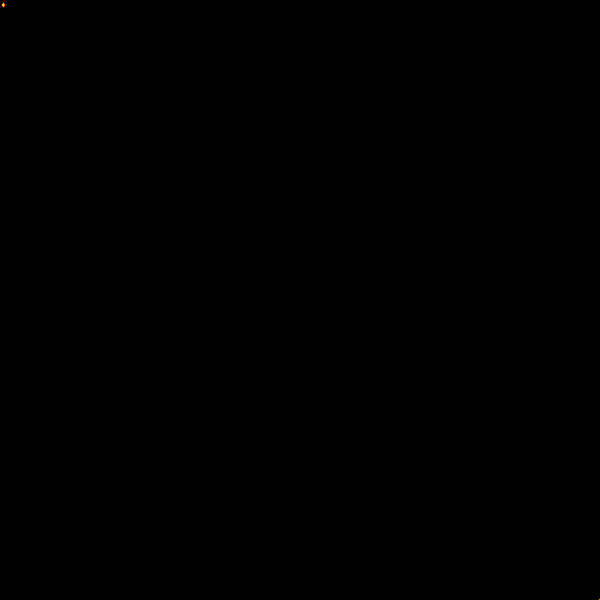

In [31]:
agg = ds.Canvas().points(nyctaxi_small, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire),"black")

Why can't we see anything? Wait, do you see the small dots on the left top? Can that be New York City? Maybe we don't see anything because some people travel very far? or because the dataset has some missing data?

**Q: Can you first check whether there are NaNs? Then drop them and draw the map again?** 

In [32]:
# Implement: Check whether we have NaNs
print('dropoff_longitude', ':' , nyctaxi_small.dropoff_longitude.isna().sum())
print('dropoff_latitude',':' , nyctaxi_small.dropoff_latitude.isna().sum())

dropoff_longitude : 1
dropoff_latitude : 1


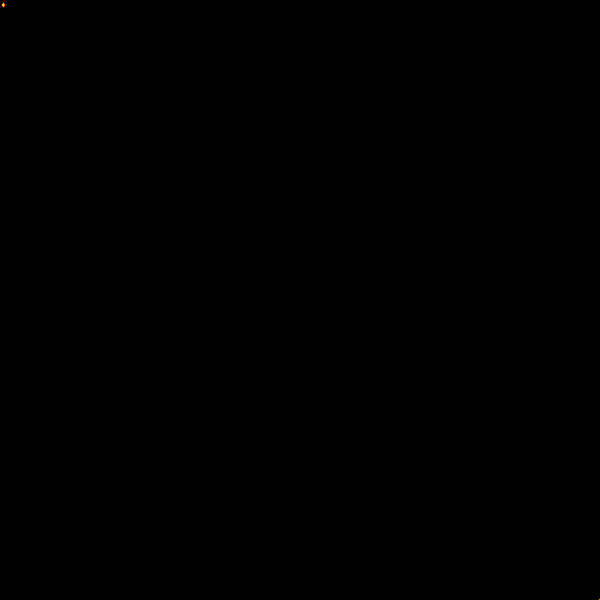

In [33]:
# Implement: drop the rows with NaN and then draw the map again. 
nyctaxi_small_drop_na = nyctaxi_small.dropna()
agg = ds.Canvas().points(nyctaxi_small_drop_na, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire),"black")

So it's not about the missing data. 

**Q: Can you identify the issue and draw the map like the following?** 

hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.between.html and histograms may be helpful. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ad842bc10>,
      dtype=object)

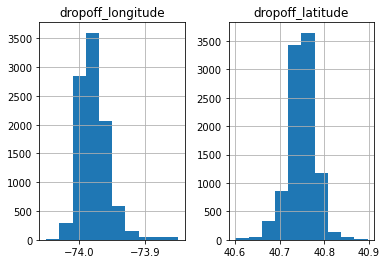

In [34]:
# Implement. You can use multiple cells to figure out what's going on. 
# TODO: Once you figure it out, Replace below dummy value of df nyctaxi_small_filtered with correct value where the issue is resolved
#nyctaxi_small_filtered = pd.DataFrame({"dropoff_longitude": [-73, -74], "dropoff_latitude": [40, 41]})
nyctaxi_small_filtered = nyctaxi_small[nyctaxi_small.dropoff_longitude.between(-74.05,-73.85) & nyctaxi_small.dropoff_latitude.between(40.6,40.9)]
nyctaxi_small_filtered.hist()

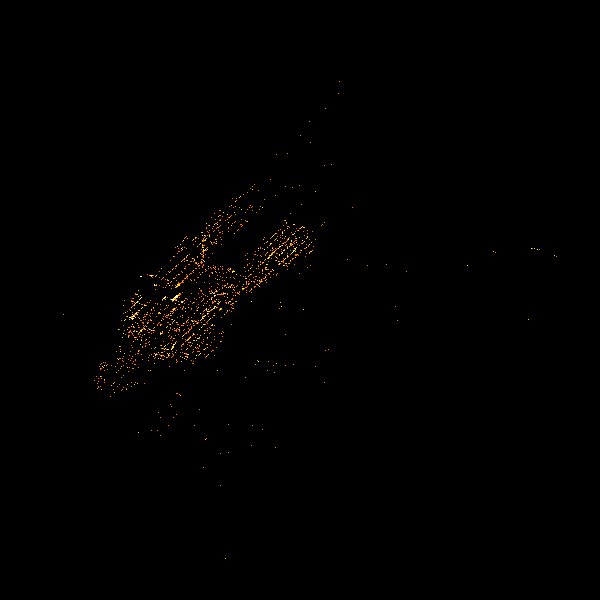

In [35]:
agg = ds.Canvas().points(nyctaxi_small_filtered, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire), "black")

Do you see the black empty space at the center? That looks like the Central Park. This is cool, but it'll be awesome if we can explore the data interactively. 

Q. Ok, now let's get serious by loading the **whole** dataset. It may take some time. **Apply the same data cleaning procedure.**

In [37]:
# Implement 
nyctaxi = pd.read_csv('/content/nyc_taxi_data_2014.csv',usecols=['dropoff_longitude', 'dropoff_latitude'])
nyctaxi_filtered = nyctaxi[nyctaxi.dropoff_longitude.between(-74.05,-73.85) & nyctaxi.dropoff_latitude.between(40.6,40.9)]
len(nyctaxi_filtered)

14541714

Can you feed the data directly to datashader to reproduce the static plot, this time with the full data?

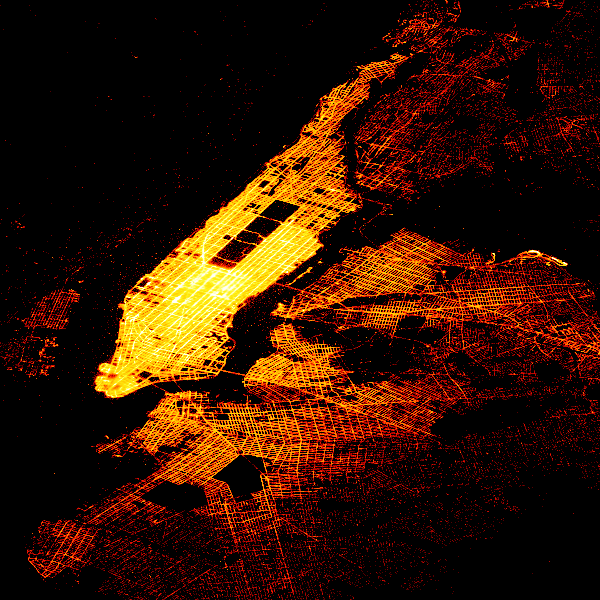

In [38]:
# Implement
agg = ds.Canvas().points(nyctaxi_filtered, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire), "black")

Wow, that's fast. Also it looks cool! 

Let's try the interactive version from here: https://datashader.org/getting_started/Introduction.html

In [39]:
import holoviews as hv
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

map_tiles  = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points     = hv.Points(nyctaxi_small_filtered, ['dropoff_longitude', 'dropoff_latitude'])
taxi_trips = datashade(points, x_sampling=1, y_sampling=1, cmap=fire, width=900, height=480)

map_tiles * taxi_trips


Output hidden; open in https://colab.research.google.com to view.

Why does it say "map data not yet available"? The reason is the difference between two coordinate systems. If you google this error message, you can find https://stackoverflow.com/questions/44487898/map-background-with-datashader-map-data-not-yet-available. 

You can use `datashader.utils.lnglat_to_meters` to convert your latitudes and longitudes to a format that holoviews understands. More on this here: https://datashader.org/user_guide/Geography.html 

**Q: Can you draw an interactive map by converting the lnglat data to x, y coordinate explained above?**

In [40]:
# Implemen

import datashader as ds
x,y = ds.utils.lnglat_to_meters(nyctaxi_filtered.dropoff_longitude, nyctaxi_filtered.dropoff_latitude)
map_tiles  = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points     = hv.Points((x,y))
taxi_trips = datashade(points, x_sampling=1, y_sampling=1, cmap=fire, width=900, height=480)
map_tiles * taxi_trips

Output hidden; open in https://colab.research.google.com to view.

It's interactive! Actually, if you are running a bokeh server and there is a live python process, the map quickly refreshes and show more details as you zoom. 

**Q: how many rows (data points) are we visualizing right now?**

In [41]:
# figure it ouy
len(points)

14541714

That's a lot of data points. If we are using a vector format, it is probably hopeless to expect any interactivity because you need to move that many points! Yet, datashader + holoviews + bokeh renders everything almost in real time! 

## Leaflet 

Another useful tool is Leaflet. It allows you to use various map tile data (Google maps, Open streetmap, ...) with many types of marks (points, heatmap, etc.). [Leaflet.js](https://leafletjs.com) is one of the easiest options to do that on the web, and there is a Python bridge of it: https://github.com/jupyter-widgets/ipyleaflet. Although we will not go into details, it's certainly something that's worth checking out if you're using geographical data. 

In [42]:
%shell jupyter nbconvert --to html /content/m12_lab.ipynb

[NbConvertApp] Converting notebook /content/m12_lab.ipynb to html
/usr/local/lib/python3.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Writing 4739935 bytes to /content/m12_lab.html
